# 1. Introduction

In part 4 of this series, we will examine distribution of individual data points along the principal components (PCs) identified using factor analysis for mixed data (FAMD). This provides some ideas as to how distinct certain subpopulations are within the entire dataset, which would be helpful to know before attempting any machine learning algorithms for clustering and/or prediction.

If you have not seen the first three parts, please find them under the "Files" tab, as things will make quite a bit more sense with those in mind. :)

# 2. Import and pre-process data

In [1]:
## For analyses in R
df <- read.csv('https://github.com/nd823/data-cleaning/raw/master/telco_cleaned_Jun13.csv')

df <- within(df, rm('Calculated_TotalCharges'))

In [2]:
## For analyses in Python
import pandas as pd

df = pd.read_csv('https://github.com/nd823/data-cleaning/raw/master/telco_cleaned_Jun13.csv')

df.drop('Calculated_TotalCharges', axis=1, inplace=True)

# 3. Plot individual data points

Both `FactoMineR` and `PCAmixdata` can plot all individual points in the dataset along any two given PCs and (most importantly) colour them according to a grouping variable. So I will shown only the `FactoMineR` implementation here.

In our Telco dataset example, I coloured the points by the target variable, `Churn`.

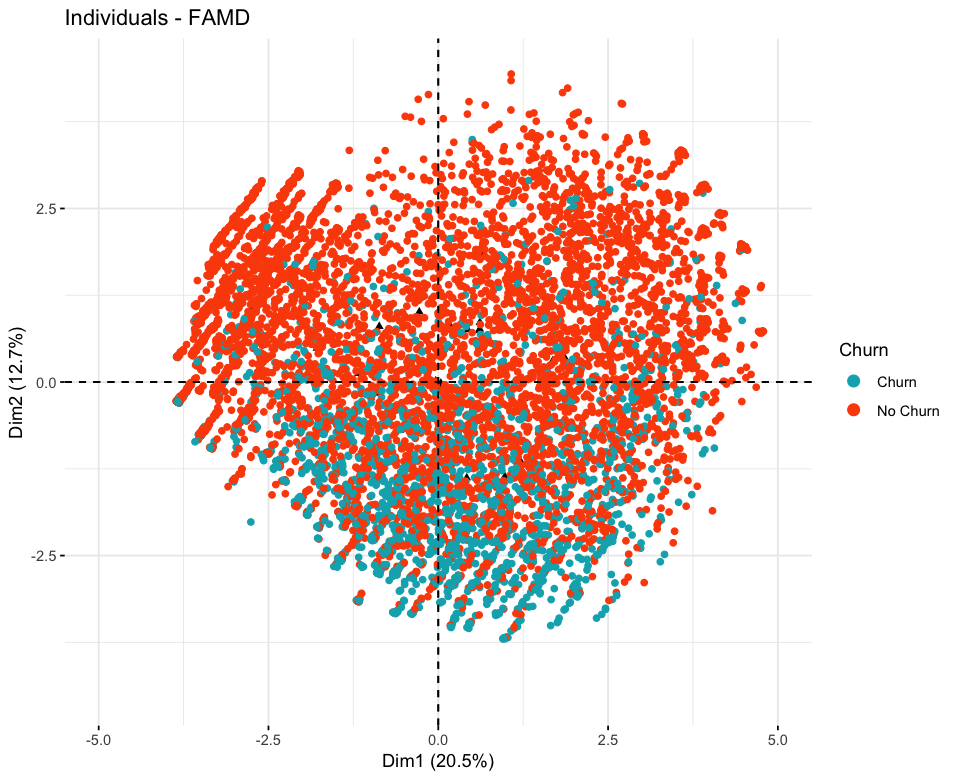

In [17]:
## Import libraries
library(FactoMineR)
library(factoextra)

## PCA
res.famd <- FAMD(df, 
                 sup.var = 19, 
                 graph = FALSE, 
                 ncp=25)

options(repr.plot.width=8, repr.plot.height=6.5)

fviz_famd_ind(res.famd,
             habillage = "Churn", # color by groups 
             palette = c("#00AFBB", "#FC4E07"),
             label = "none",
             repel = TRUE) +
             xlim(-5, 5) + ylim (-4.5, 4.5)

As individuals with similar profiles (in this case, in terms of customer behaviour) are close to each other on the figure, given the large overlap between the "Churn" and "No churn" populations of customers, this suggests that *if* there are significant/meaningful differences between the two populations, they are likely complex and non-linear. 

Nevertheless, we see **more separation between the two populations along PC2 than PC1**. Recall from part 2 of this series that, after varimax rotation, PC2 is most associated with the variables `Contract` and `Tenure`. This suggests that these two properties may represent notable differences between the "Churn" and "No churn" customers, and worth further investigation.

If you want to use Python, the `prince` package appears to have a similar function (`famd.plot_row_coordinates()`). However, as the package documentation is still in its early stages, I am not confident in enough in my interpretation of the parameters involved to show it here. As more information becomes available, I will update this post.

See you in the next post! :)